In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.tokenize import word_tokenize

In [ ]:
helper_path = "../code/"
sys.path.insert(0, helper_path)

In [ ]:
from New_MissingValue import MissingValue

In [ ]:
# relative path
data_path = "../data/"
data_file_list = ["train.csv","test.csv"]

In [ ]:
# load data
data_train = pd.read_csv(data_path + data_file_list[0])
data_test = pd.read_csv(data_path + data_file_list[1])

# data info
print(f'Training text file: {data_train.shape[0]} rows; {data_train.shape[1]} columns')
print(f'Testing text file: {data_test.shape[0]} rows; {data_test.shape[1]} columns')
data_train.head()

In [ ]:
# check if NaNs exist in training data, and acquire their locations
missing_value_finder_train = MissingValue(data_train)
missing_value_finder_train.missing_value_summary(verbose=True)
missing_value_finder_train.missing_value_enumerator()

In [ ]:
# drop this missing row
for obj in missing_value_finder_train.na_index:
    data_train = data_train.drop([obj])

In [ ]:
# check again
missing_value_finder_train = MissingValue(data_train)
missing_value_finder_train.missing_value_summary(verbose=True)

In [ ]:
data_train.to_csv('../data/train_no_missingValue.csv')

In [ ]:
# check if NaNs exist in test data, and acquire their locations
missing_value_finder_test = MissingValue(data_test)
missing_value_finder_test.missing_value_summary(verbose=True)

Note:
- Missing value check & elimination finished 

# Data Classification

- Classify the data by their features, and save them into separate csv files, named "Positive.csv", "Negative.csv" and "Neutral.csv"

In [ ]:
def SentiSeparation(data):
    Positive=data[data['sentiment']=='positive']
    Negative=data[data['sentiment']=='negative']
    Neutral=data[data['sentiment']=='neutral']
    Positive.to_csv(r'../data/Positive.csv')
    Negative.to_csv(r'../data/Negative.csv')
    Neutral.to_csv(r'../data/Neutral.csv')

In [ ]:
SentiSeparation(data_train)

# Data Cleaning

Since the data set is too large, running through all the data may take too long. Therefore, only data with feature "positive" is tested at this time.

In [2]:
process_path = "../code/"
sys.path.insert(0, process_path)

In [3]:
from TextPreprocessing import *
from StaAnalysis import StaA
import nltk

In [ ]:
Positive=pd.read_csv("../data/Positive/Positive.csv")
Positive=pd.DataFrame(Positive)
Positive.head()

In [ ]:
Negative=pd.read_csv("../data/Negative/Negative.csv")
Negative=pd.DataFrame(Negative)
Negative.head()

In [ ]:
Neutral=pd.read_csv("../data/Neutral/Neutral.csv")
Neutral=pd.DataFrame(Neutral)
Neutral.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Negative_clean_data.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Negative,feature,save1)
selected_text.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Neutral_clean_data.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Neutral,feature,save1)
selected_text.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Positive/Positive_clean_data.csv'
#save2='../data/Positive/Positive_clean_data_2bused.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Positive,feature,save1)
selected_text.head()

# Preparation for Statistical Analysis -- Unigram/Multi-gram

Cleaned data are used to do statistical analysis. Due to the large size of the data to be processed, only first 50 sets of data are tested to verify the code.

## Sentiment: "Positive"

In [4]:
path='../data/Positive/Positive_clean_data.csv'
split_selected_text,split_selected_word,n_document=StaA.filter_out(path)

check if unigram works, N=1

In [5]:
split_selected_text[:5]

[['good'], ['better'], ['had', 'an', 'awsome', 'salad'], ['fine'], ['thank']]

In [6]:
split_selected_word[:5]

['good', 'better', 'had', 'an', 'awsome']

In [7]:
n_document

8582

In [8]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_idf,uni_tf_idf,uni_rank=StaA.ranking(uni_frequency,uni_presence,n_document,uni_gram,'../data/Positive/uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
9.866491079330444


Text(0.5, 1.0, 'tf-idf')

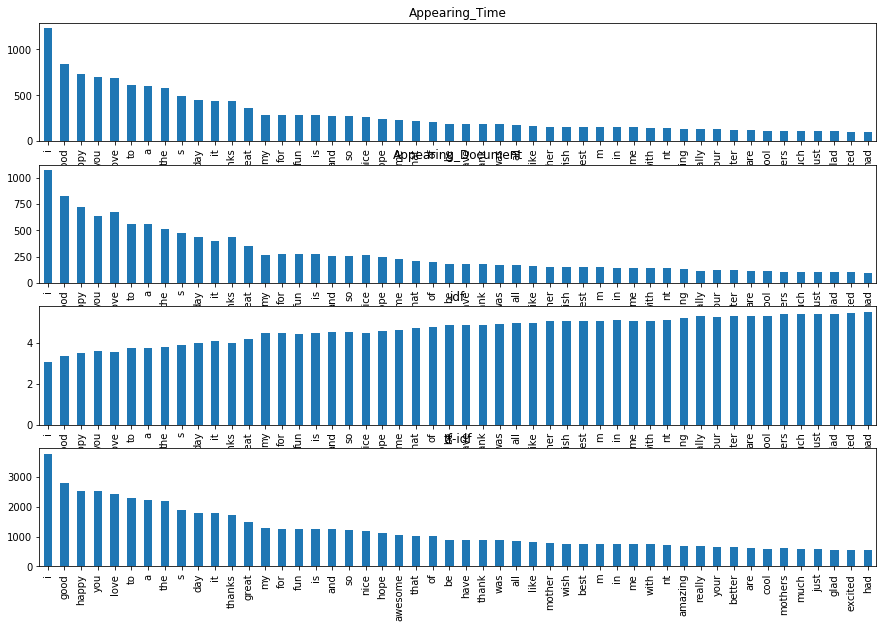

In [10]:
# high frequency word
plt.subplot(4,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
uni_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
uni_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [11]:
print(uni_rank)

          frequency  presence       idf       tf-idf
i              1227    1072.0  3.079325  3778.331823
good            836     824.0  3.342155  2794.041911
happy           729     722.0  3.474130  2532.640449
you             703     632.0  3.607068  2535.769057
love            683     670.0  3.548770  2423.809667
...             ...       ...       ...          ...
sadness           1       1.0  9.364392     9.364392
latte             1       1.0  9.364392     9.364392
cities            1       1.0  9.364392     9.364392
camp              1       1.0  9.364392     9.364392
midterms          1       1.0  9.364392     9.364392

[3921 rows x 4 columns]


In [12]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_idf,bi_tf_idf,bi_rank=StaA.ranking(bi_frequency,bi_presence,n_document,bi_gram,'../data/Positive/bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
27.740236043930054


Text(0.5, 1.0, 'tf-idf')

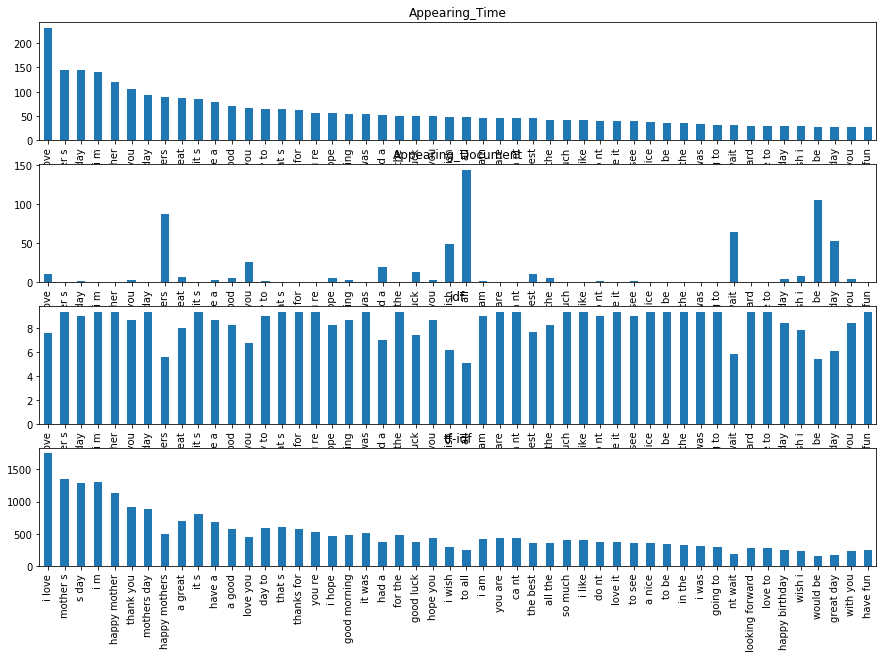

In [13]:
# high frequency word
plt.subplot(4,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
bi_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
bi_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [14]:
print(bi_rank)

                 frequency  presence       idf       tf-idf
i love                 231      11.0  7.572632  1749.278022
mother s               145       1.0  9.364392  1357.836782
s day                  144       2.0  8.958926  1290.085415
i m                    140       1.0  9.364392  1311.014824
happy mother           121       1.0  9.364392  1133.091384
...                    ...       ...       ...          ...
cable in                 1       1.0  9.364392     9.364392
and laugh                1       1.0  9.364392     9.364392
a homeless               1       1.0  9.364392     9.364392
perfect holiday          1       7.0  7.978097     7.978097
dat i                    1       1.0  9.364392     9.364392

[12877 rows x 4 columns]


check if multi-gram works, N=4

In [16]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_idf,tri_tf_idf,tri_rank=StaA.ranking(tri_frequency,tri_presence,n_document,tri_gram,'../data/Positive/tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
25.202944040298462


Text(0.5, 1.0, 'tf-idf')

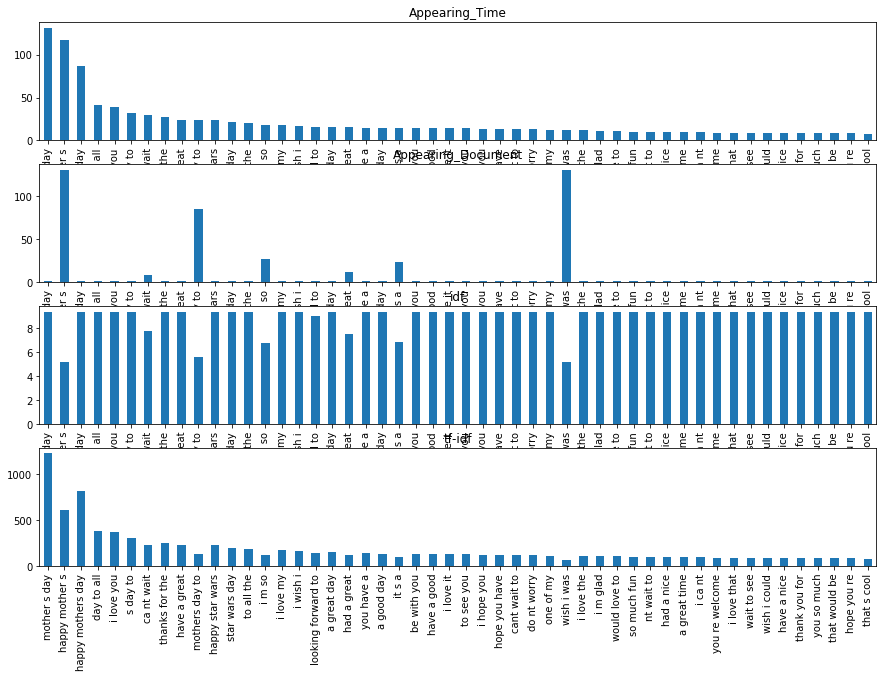

In [17]:
# high frequency word
plt.subplot(4,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tri_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tri_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [18]:
print(tri_rank)

                   frequency  presence       idf       tf-idf
mother s day             131       1.0  9.364392  1226.735300
happy mother s           117     131.0  5.174737   605.444213
happy mothers day         87       1.0  9.364392   814.702069
day to all                41       1.0  9.364392   383.940056
i love you                39       1.0  9.364392   365.211272
...                      ...       ...       ...          ...
for sharing it             1       1.0  9.364392     9.364392
my whole entire            1       1.0  9.364392     9.364392
the of may                 1       1.0  9.364392     9.364392
the mvp this               1       1.0  9.364392     9.364392
from working out           1       2.0  8.958926     8.958926

[14708 rows x 4 columns]


In [19]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_idf,tert_tf_idf,tert_rank=StaA.ranking(tert_frequency,tert_presence,n_document,tert_gram,'../data/Positive/tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
23.27904486656189


Text(0.5, 1.0, 'tf-idf')

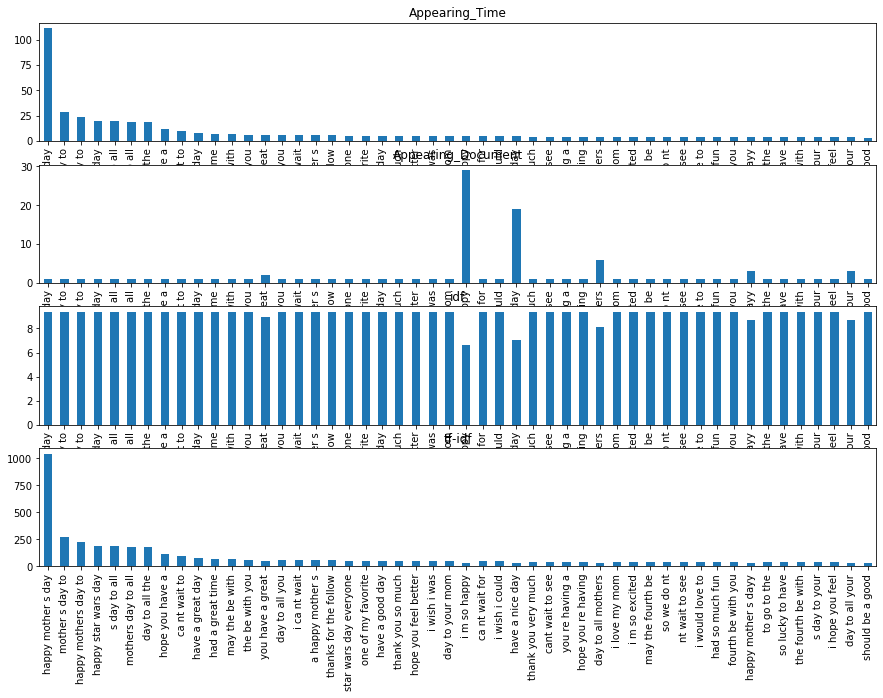

In [20]:
# high frequency word
plt.subplot(4,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tert_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tert_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [21]:
print(tert_rank)

                          frequency  presence       idf       tf-idf
happy mother s day              111       1.0  9.364392  1039.447468
mother s day to                  29       1.0  9.364392   271.567356
happy mothers day to             24       1.0  9.364392   224.745398
happy star wars day              20       1.0  9.364392   187.287832
s day to all                     20       1.0  9.364392   187.287832
...                             ...       ...       ...          ...
omg it s the                      1       1.0  9.364392     9.364392
princess i love lingerie          1       1.0  9.364392     9.364392
thanks for tweeting a             1       1.0  9.364392     9.364392
a better day too                  1       1.0  9.364392     9.364392
it in nashville and               1       1.0  9.364392     9.364392

[12986 rows x 4 columns]


## Sentiment: Negative

In [22]:
negative_path='../data/Negative/Negative_clean_data.csv'
split_selected_text,split_selected_word,n_document=StaA.filter_out(negative_path)

check if unigram works, N=1

In [23]:
split_selected_text[:5]

[['i', 'dont', 'think', 'you', 'can', 'vote', 'anymore'],
 ['headache'],
 ['miss', 'you', 'my', 'dear'],
 ['my', 'tummy', 'is', 'not', 'happy', 'boo'],
 ['s', 'not', 'good']]

In [24]:
split_selected_word[:5]

['i', 'dont', 'think', 'you', 'can']

In [25]:
n_document

7786

In [26]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_idf,uni_tf_idf,uni_rank=StaA.ranking(uni_frequency,uni_presence,n_document,uni_gram,'../data/Negative/uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
12.578660726547241


Text(0.5, 1.0, 'tf-idf')

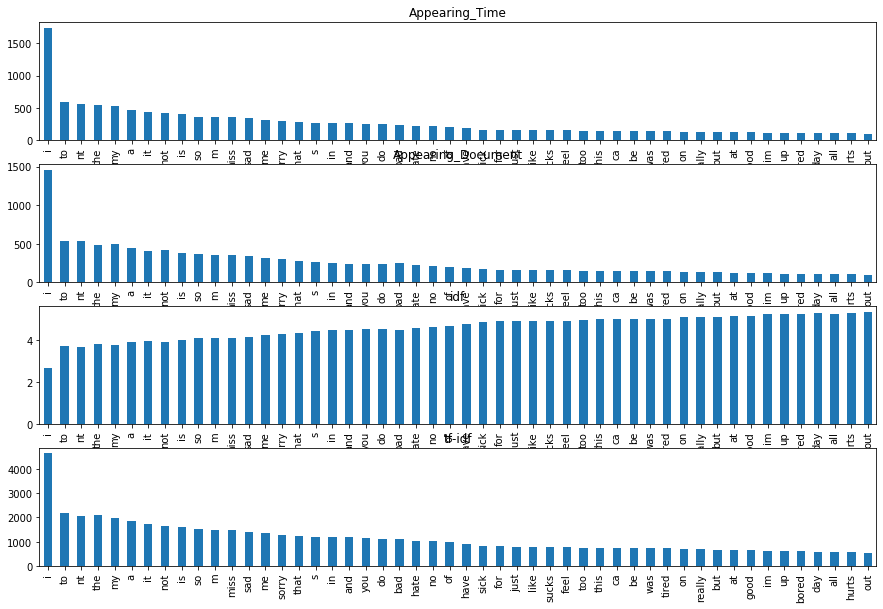

In [27]:
# high frequency word
plt.subplot(4,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
uni_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
uni_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [28]:
print(uni_rank)

          frequency  presence       idf       tf-idf
i              1733    1458.0  2.674704  4635.262737
to              595     529.0  3.687334  2193.963700
nt              560     541.0  3.664945  2052.369174
the             549     477.0  3.790600  2081.039522
my              526     496.0  3.751621  1973.352609
...             ...       ...       ...          ...
cranking          1       1.0  9.267064     9.267064
magic             1       1.0  9.267064     9.267064
letdown           1       1.0  9.267064     9.267064
throo             1       1.0  9.267064     9.267064
position          1       1.0  9.267064     9.267064

[4547 rows x 4 columns]


In [29]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_idf,bi_tf_idf,bi_rank=StaA.ranking(bi_frequency,bi_presence,n_document,bi_gram,'../data/Negative/bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
34.736557722091675


Text(0.5, 1.0, 'tf-idf')

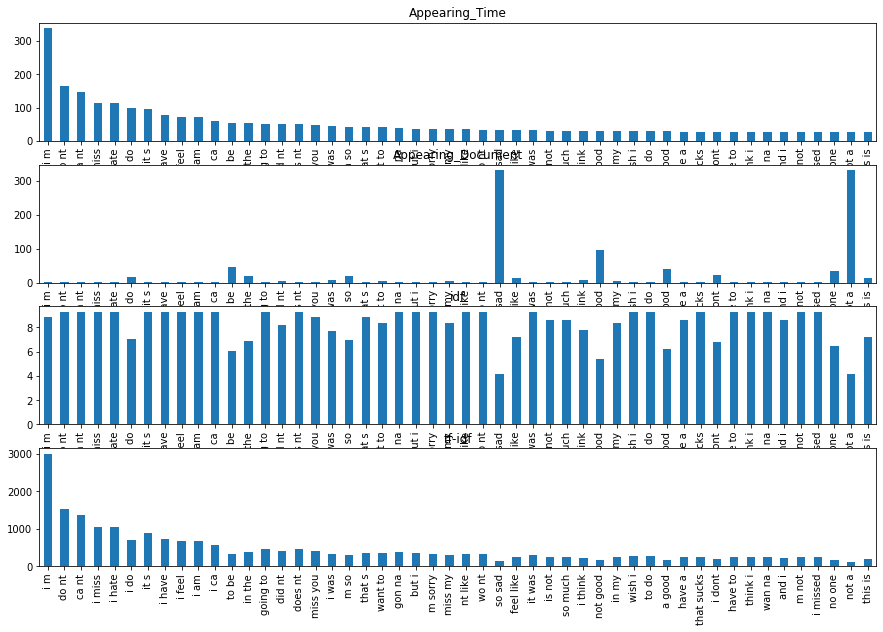

In [30]:
# high frequency word
plt.subplot(4,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
bi_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
bi_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [31]:
print(bi_rank)

           frequency  presence       idf       tf-idf
i m              338       2.0  8.861599  2995.220349
do nt            165       1.0  9.267064  1529.065523
ca nt            147       1.0  9.267064  1362.258375
i miss           113       1.0  9.267064  1047.178207
i hate           113       1.0  9.267064  1047.178207
...              ...       ...       ...          ...
still is           1      28.0  6.592915     6.592915
be race            1       3.0  8.573917     8.573917
all old            1       1.0  9.267064     9.267064
there now          1      72.0  5.669752     5.669752
am living          1       2.0  8.861599     8.861599

[14406 rows x 4 columns]


check if multi-gram works, N=3

In [32]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_idf,tri_tf_idf,tri_rank=StaA.ranking(tri_frequency,tri_presence,n_document,tri_gram,'../data/Negative/tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
31.533030033111572


Text(0.5, 1.0, 'tf-idf')

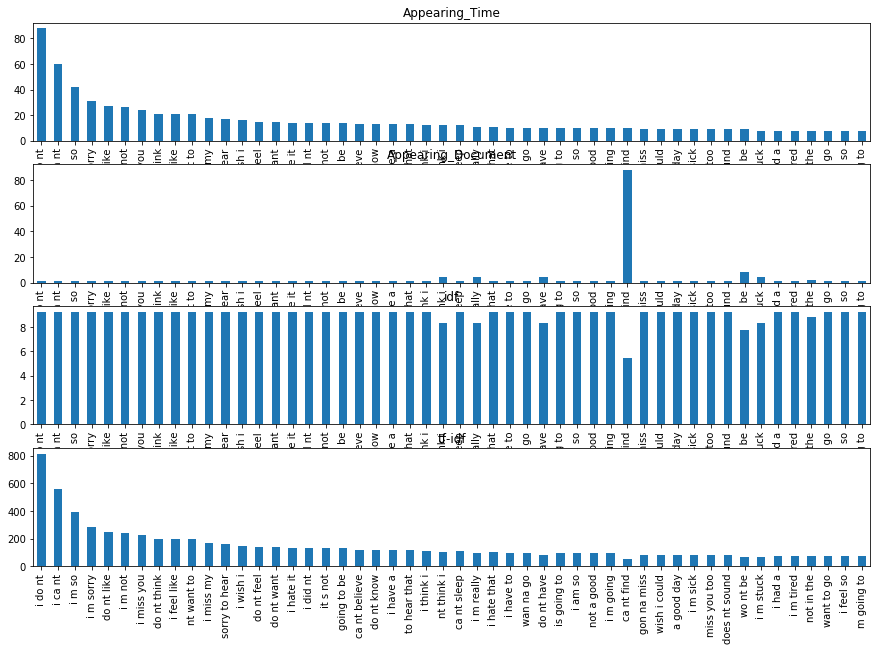

In [33]:
# high frequency word
plt.subplot(4,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tri_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tri_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [34]:
print(tri_rank)

                  frequency  presence       idf      tf-idf
i do nt                  88       1.0  9.267064  815.501612
i ca nt                  60       1.0  9.267064  556.023827
i m so                   42       1.0  9.267064  389.216679
i m sorry                31       1.0  9.267064  287.278977
do nt like               27       1.0  9.267064  250.210722
...                     ...       ...       ...         ...
citizens wo nt            1       1.0  9.267064    9.267064
stephane does nt          1       1.0  9.267064    9.267064
no as b                   1       2.0  8.861599    8.861599
he did nt                 1       1.0  9.267064    9.267064
nt talk and               1       1.0  9.267064    9.267064

[16683 rows x 4 columns]


In [35]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_idf,tert_tf_idf,tert_rank=StaA.ranking(tert_frequency,tert_presence,n_document,tert_gram,'../data/Negative/tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
26.567296028137207


Text(0.5, 1.0, 'tf-idf')

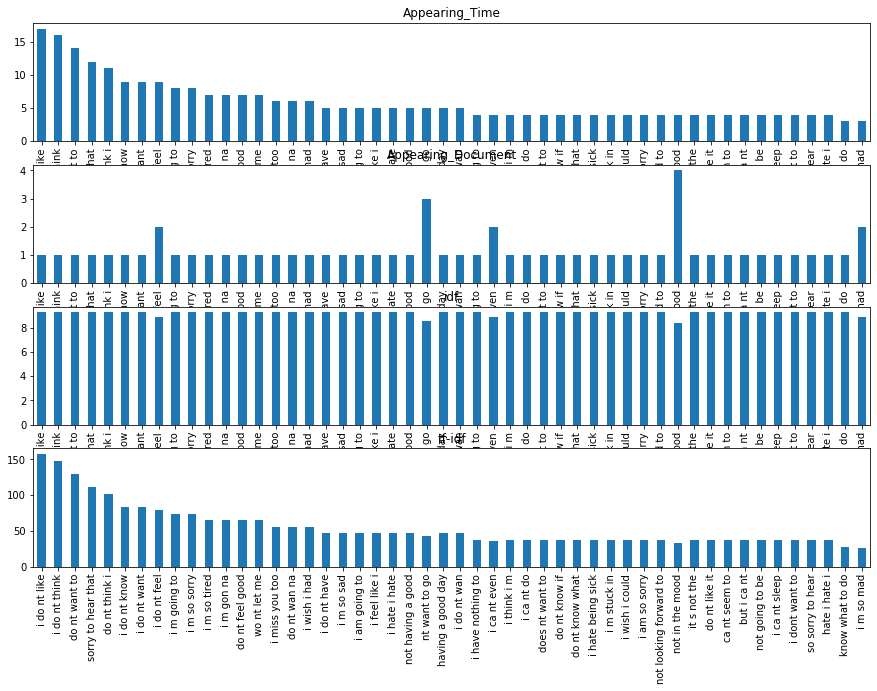

In [37]:
# high frequency word
plt.subplot(4,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tert_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tert_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [38]:
print(tert_rank)

                      frequency  presence       idf      tf-idf
i do nt like                 17       1.0  9.267064  157.540084
i do nt think                16       1.0  9.267064  148.273020
do nt want to                14       1.0  9.267064  129.738893
sorry to hear that           12       1.0  9.267064  111.204765
do nt think i                11       1.0  9.267064  101.937702
...                         ...       ...       ...         ...
happen in a we                1       1.0  9.267064    9.267064
ever be the same              1       1.0  9.267064    9.267064
t i have an                   1       1.0  9.267064    9.267064
phone service oh yea          1       1.0  9.267064    9.267064
i ever do to                  1       1.0  9.267064    9.267064

[14730 rows x 4 columns]


## Sentiment: Neutral

In [39]:
neutral_path='../data/Neutral/Neutral_clean_data.csv'
split_selected_text,split_selected_word,n_document=StaA.filter_out(neutral_path)

check if unigram works, N=1

In [40]:
split_selected_text[:5]

[['my', 'boss', 'was', 'not', 'happy', 'them', 'lots', 'of', 'fun'],
 ['says', 'good', 'or', 'should', 'i', 'say', 'bad', 'afternoon'],
 ['why',
  'do',
  'nt',
  'adobe',
  'realise',
  'no',
  'one',
  'wants',
  'to',
  'pay',
  'for',
  'photoshop',
  'et',
  'al',
  'so',
  'they',
  'should',
  'just',
  'give',
  'it',
  'to',
  'us',
  'for',
  'free'],
 ['prd', 'take', 'a', 'long', 'time', 'to', 'review'],
 ['well',
  'having',
  'to',
  'revise',
  'them',
  'was',
  'to',
  'do',
  'some',
  'more',
  'gardening',
  'now',
  'i',
  'guess',
  'hoovering',
  'and',
  'some',
  'warcraft',
  'not',
  'played',
  'in',
  'a',
  'week']]

In [41]:
split_selected_word[:5]

['my', 'boss', 'was', 'not', 'happy']

In [46]:
n_document

11117

In [42]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_idf,uni_tf_idf,uni_rank=StaA.ranking(uni_frequency,uni_presence,n_document,uni_gram,'../data/Neutral/uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
93.8493480682373


Text(0.5, 1.0, 'tf-idf')

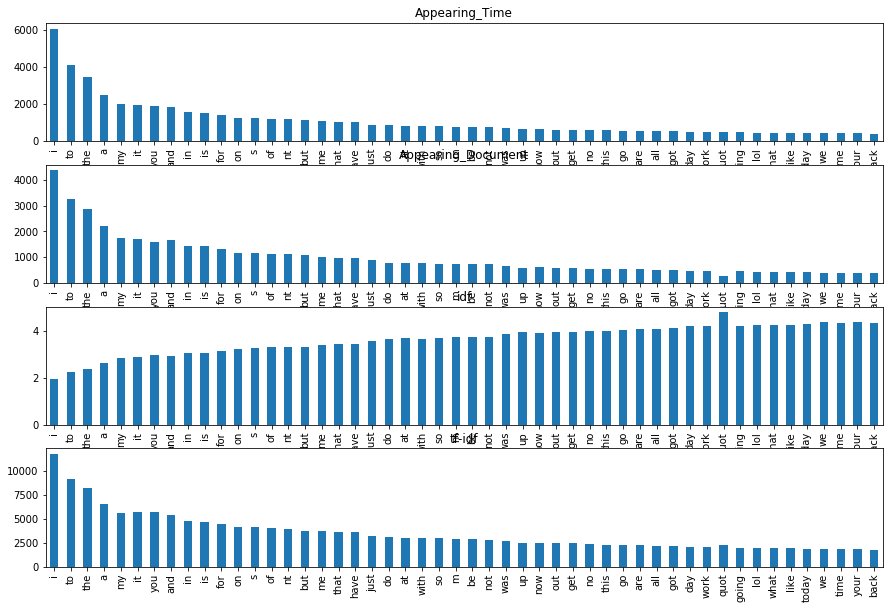

In [43]:
# high frequency word
plt.subplot(4,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
uni_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
uni_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [44]:
print(uni_rank)

         frequency  presence       idf        tf-idf
i             6071    4376.0  1.932202  11730.397482
to            4099    3265.0  2.224999   9120.272631
the           3483    2866.0  2.355299   8203.507217
a             2482    2196.0  2.621473   6506.495051
my            1977    1755.0  2.845527   5625.606723
...            ...       ...       ...           ...
inning           1       1.0  9.623174      9.623174
grice            1       1.0  9.623174      9.623174
antonio          1       1.0  9.623174      9.623174
haggis           1       1.0  9.623174      9.623174
rosa             1       1.0  9.623174      9.623174

[13570 rows x 4 columns]


In [45]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_idf,bi_tf_idf,bi_rank=StaA.ranking(bi_frequency,bi_presence,n_document,bi_gram,'../data/Neutral/bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
386.14505100250244


Text(0.5, 1.0, 'tf-idf')

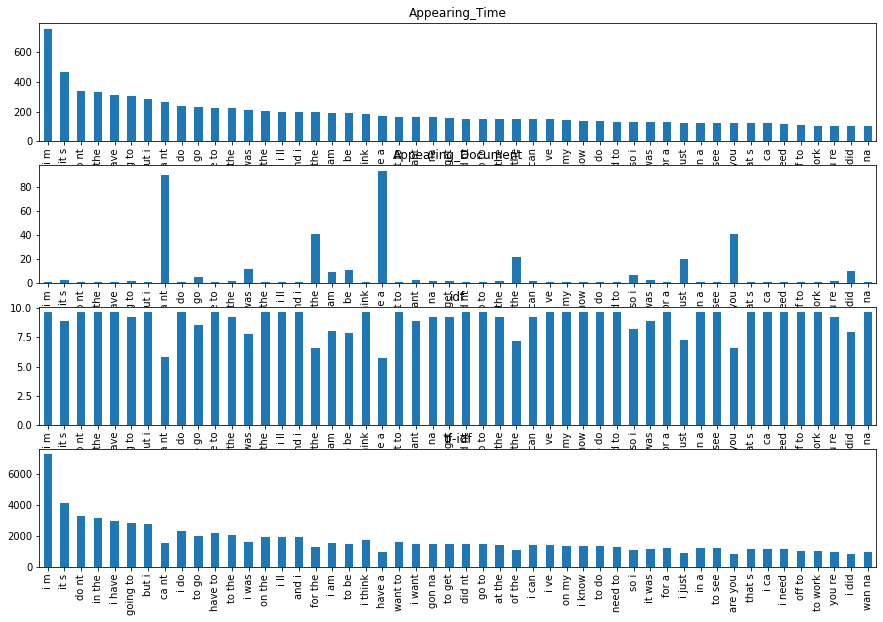

In [47]:
# high frequency word
plt.subplot(4,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
bi_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
bi_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [48]:
print(bi_rank)

                frequency  presence       idf       tf-idf
i m                   759       1.0  9.623174  7303.988698
it s                  467       3.0  8.930026  4170.322298
do nt                 343       1.0  9.623174  3300.748516
in the                332       1.0  9.623174  3194.893607
i have                310       1.0  9.623174  2983.183790
...                   ...       ...       ...          ...
long nap                1      14.0  7.608270     7.608270
easywriter pro          1       9.0  8.013736     8.013736
before getting          1       5.0  8.524561     8.524561
despite the             1       1.0  9.623174     9.623174
where his               1       2.0  9.217708     9.217708

[65973 rows x 4 columns]


check if multi-gram works, N=3

In [49]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_idf,tri_tf_idf,tri_rank=StaA.ranking(tri_frequency,tri_presence,n_document,tri_gram,'../data/Neutral/tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
538.6496608257294


Text(0.5, 1.0, 'tf-idf')

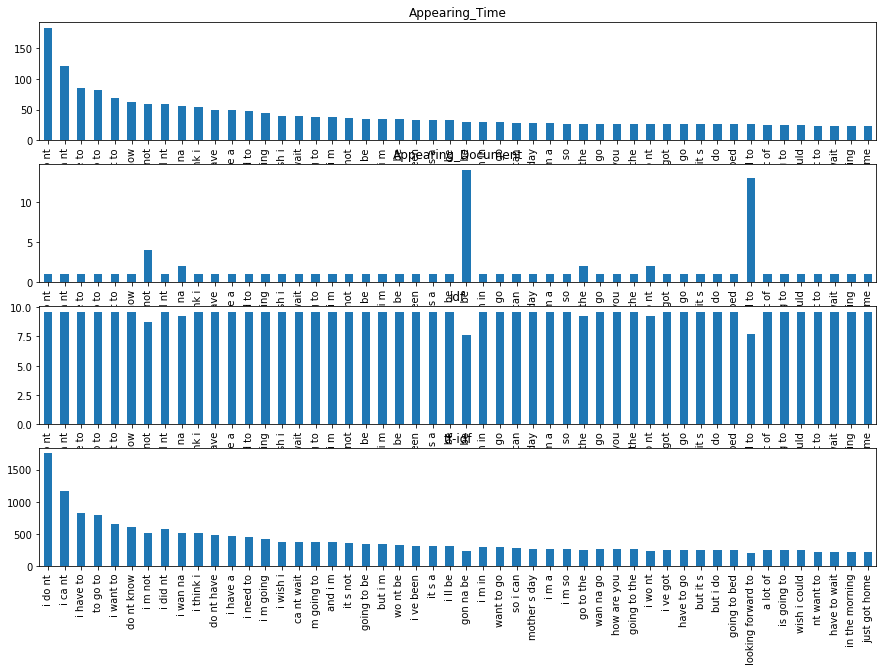

In [50]:
# high frequency word
plt.subplot(4,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tri_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tri_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [51]:
print(tri_rank)

                   frequency  presence       idf       tf-idf
i do nt                  182       1.0  9.623174  1751.417580
i ca nt                  121       1.0  9.623174  1164.403995
i have to                 85       1.0  9.623174   817.969749
to go to                  82       1.0  9.623174   789.100228
i want to                 68       1.0  9.623174   654.375799
...                      ...       ...       ...          ...
not losing them            1       1.0  9.623174     9.623174
prom tomorrow ugh          1       1.0  9.623174     9.623174
me this time               1       1.0  9.623174     9.623174
up to monroe               1       1.0  9.623174     9.623174
the wee one                1       1.0  9.623174     9.623174

[97008 rows x 4 columns]


In [52]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_idf,tert_tf_idf,tert_rank=StaA.ranking(tert_frequency,tert_presence,n_document,tert_gram,'../data/Neutral/tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
512.4449501037598


Text(0.5, 1.0, 'tf-idf')

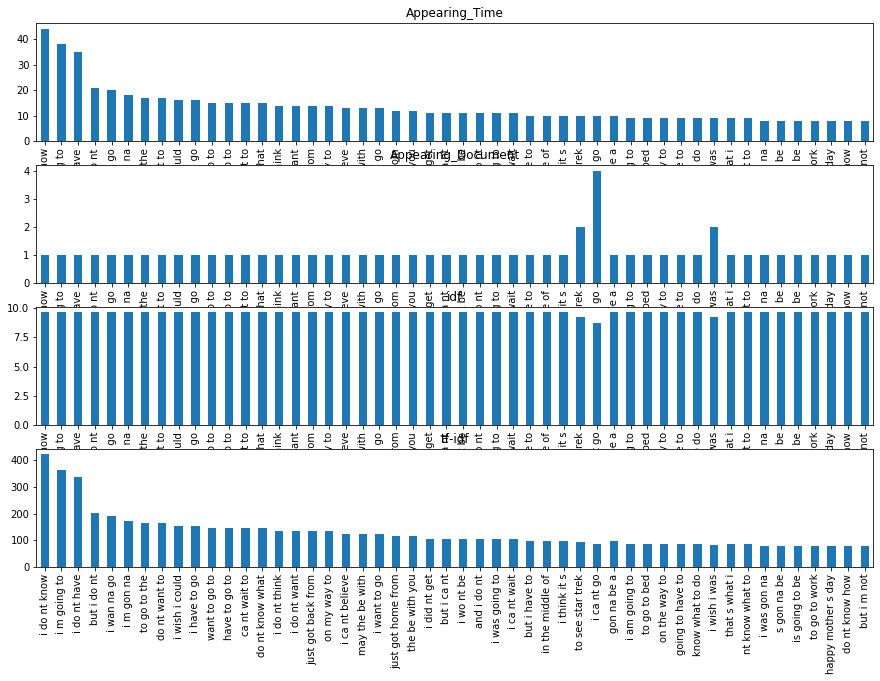

In [53]:
# high frequency word
plt.subplot(4,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tert_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tert_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [54]:
print(tert_rank)

                      frequency  presence       idf      tf-idf
i do nt know                 44       1.0  9.623174  423.419635
i m going to                 38       1.0  9.623174  365.680594
i do nt have                 35       1.0  9.623174  336.811073
but i do nt                  21       1.0  9.623174  202.086644
i wan na go                  20       1.0  9.623174  192.463470
...                         ...       ...       ...         ...
guess it all depends          1       2.0  9.217708    9.217708
tech out will get             1       1.0  9.623174    9.623174
john even before the          1       1.0  9.623174    9.623174
guys even if p.j              1       1.0  9.623174    9.623174
im going home weeks           1       1.0  9.623174    9.623174

[99002 rows x 4 columns]


# Numerify the Text Output of 'Sentiment'

In [ ]:
sentiment=pd.get_dummies(data_train['sentiment'])
print(sentiment)

Assigning sentiment information with values.

In [ ]:
from nltk import FreqDist
import pickle
import sys
import utils

In [ ]:
from collections import Counter

In [ ]:
split_selected_text